In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp 
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import butter,filtfilt
from sklearn.linear_model import LinearRegression


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Reading our csv files

In [ ]:
dfB = pd.read_csv("Data-Table 1.csv",thousands=',')
dfW = pd.read_csv("london_weather.csv",parse_dates=["date"])

Getting general information on our files like the shape, coloumn names, and types

In [ ]:
print(dfB.shape)
print(dfW.shape)

In [ ]:
print(dfB.columns)
print(dfW.columns)

In [ ]:
print(dfB.info())
print(dfW.info())

In [ ]:
print(dfB.describe())
print(dfW.describe())

Dropping unnessiscary colunms from the bike data set

In [ ]:
dfB = dfB.drop(columns = ['Unnamed: 2','Month','Number of Bicycle Hires.1', 'Unnamed: 5', 'Year',
       'Number of Bicycle Hires.2', 'Unnamed: 8', 'Month.1',
       'Average Hire Time (mins)', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'])


Converting the timestamps to dates and formatting the dates

In [ ]:
dfB = dfB.convert_dtypes()
dfB["Day"] = pd.to_datetime(dfB["Day"])
dfW = dfW.convert_dtypes()
dfW["date"] = pd.to_datetime(dfW["date"])

dfB["Day"] = dfB["Day"].dt.strftime('%Y-%m-%d')
dfW["date"] = dfW["date"].dt.strftime('%Y-%m-%d')

Splicing the data sets so they line up with each other

In [ ]:
print(dfW['date'][0])
print(dfW['date'][-1:])
print(dfB['Day'][0])
print(dfB['Day'][-1:])

dfW = dfW[~(dfW['date'] < '2010-07-30')]
dfB = dfB[~(dfB['Day'] > '2020-12-31')]

Setting the index to the dates coloumn

In [ ]:
dfW["date"] = pd.to_datetime(dfW["date"])
dfB["Day"] = pd.to_datetime(dfB["Day"])
dfB = dfB.set_index("Day")
dfW = dfW.set_index("date")

In [ ]:
dfW.info()
dfB.info()

a graph of the snow depth

In [ ]:
sns.lineplot(x=dfW.index, y=dfW["snow_depth"],  color='dodgerblue')

a graph of the missing values in the weather data sets

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(dfW.isna().transpose(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
plt.show()

Getting the exact amount of nan values 

In [ ]:
dfW.isna().sum()


Converting the types to floats

In [ ]:
dfW["cloud_cover"] = dfW["cloud_cover"].values.astype(float)
dfW["global_radiation"] = dfW["global_radiation"].values.astype(float)
dfW["max_temp"] = dfW["max_temp"].values.astype(float)
dfW["mean_temp"] = dfW["mean_temp"].values.astype(float)
dfW["min_temp"] = dfW["min_temp"].values.astype(float)
dfW["precipitation"] = dfW["precipitation"].values.astype(float)
dfW["snow_depth"] = dfW["snow_depth"].values.astype(float)



dfW.info()

Plotting a graph to show the interpolation on snow depth

In [ ]:
data = dfW
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
sns.lineplot(x=data.index, y=data.snow_depth.interpolate(),color='darkorange', label = 'modified')
sns.lineplot(x=data.index, y=data.snow_depth.fillna(np.inf),  color='dodgerblue', label = 'original')
ax.set_title(f'Interpolate', fontsize=14)
ax.set_ylabel(ylabel='Raib', fontsize=14)
plt.show()

interpolating each colounm with nan values

In [ ]:
dfW['cloud_cover'] = dfW['cloud_cover'].interpolate()
dfW['global_radiation'] = dfW['global_radiation'].interpolate()
dfW['max_temp'] = dfW['max_temp'].interpolate()
dfW['mean_temp'] = dfW['mean_temp'].interpolate()
dfW['min_temp'] = dfW['min_temp'].interpolate()
dfW['precipitation'] = dfW['precipitation'].interpolate()
dfW['snow_depth'] = dfW['snow_depth'].interpolate()
dfW['snow_depth'] = dfW['snow_depth'].bfill()


creating a graph with all the weather value coloums

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=3, sharex=True, figsize=(16,12))

ax[0][0].bar(dfW.index, dfW.cloud_cover, width=5, color='dodgerblue')
ax[0][0].set_title('Cloud Cover', fontsize=14)
ax[1][0].bar(dfW.index, dfW.global_radiation, width=5, color='dodgerblue')
ax[1][0].set_title('Global Radiation', fontsize=14)
ax[2][0].bar(dfW.index, dfW.max_temp, width=5, color='dodgerblue')
ax[2][0].set_title('Max Temp', fontsize=14)
ax[0][1].bar(dfW.index, dfW.mean_temp, width=5, color='dodgerblue')
ax[0][1].set_title('Mean Temp', fontsize=14)
ax[1][1].bar(dfW.index, dfW.min_temp, width=5, color='dodgerblue')
ax[1][1].set_title('Min Temp', fontsize=14)
ax[2][1].bar(dfW.index, dfW.precipitation, width=5, color='dodgerblue')
ax[2][1].set_title('Precipation', fontsize=14)
ax[0][2].bar(dfW.index, dfW.snow_depth, width=5, color='dodgerblue')
ax[0][2].set_title('Snow Depth', fontsize=14)
ax[1][2].bar(dfW.index, dfW.sunshine, width=5, color='dodgerblue')
ax[1][2].set_title('Sunshine', fontsize=14)
ax[2][2].bar(dfW.index, dfW.pressure, width=5, color='dodgerblue')
ax[2][2].set_title('Pressure', fontsize=14)

plt.show()

In [ ]:
sns.lineplot(x=dfB.index, y=dfB["Number of Bicycle Hires"],  color='dodgerblue')

Combining the two datasets

In [ ]:
frames = [dfW, dfB['Number of Bicycle Hires']]
df = pd.concat(frames, axis=1)

Creating a correlation graph

In [ ]:
corrmat = df.corr()
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')

Normalising the data

In [ ]:
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_norm

Initalising the k-fold

In [ ]:
kf = KFold(n_splits=10)
kf.get_n_splits(df)
print(kf)

Spliting the colounms into features and targets

In [ ]:
features = df.iloc[:, [0,1,2,3,4,5,6,7,8]].values
targets = df.iloc[:, 9].values
features_norm = df_norm.iloc[:, [0,1,2,3,4,5,6,7,8]].values
targets_norm = df_norm.iloc[:, 9].values

print(features)


Testing the linear regression model

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(df_noise)):
    X_train, X_test, Y_train, Y_test = (df_noise[features2])[train_index], (df_noise[features2])[test_index], (df_noise[target])[train_index], (df_noise[target])[test_index]
    model = LinearRegression()
    model.fit(X_train, Y_train)
    print(model.score(X_test, Y_test))

Testing the linear regression model with the normalised data

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(df_norm)):
    X_train, X_test, Y_train, Y_test = features_norm[train_index], features_norm[test_index], targets_norm[train_index], targets_norm[test_index]
    model = LinearRegression()
    model.fit(X_train, Y_train)
    print(model.score(X_test, Y_test))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test, Y_train, Y_test = features[train_index], features[test_index], targets[train_index], targets[test_index]
    model = DecisionTreeRegressor(random_state=1)
    model.fit(X_train, Y_train)
    print(model.score(X_test, Y_test))


In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(df_norm)):
    X_train, X_test, Y_train, Y_test = features_norm[train_index], features_norm[test_index], targets_norm[train_index], targets_norm[test_index]
    model = DecisionTreeRegressor(random_state=1)
    model.fit(X_train, Y_train)
    print(model.score(X_test, Y_test))

Trying train test split

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
df.columns

In [ ]:
features = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
       'min_temp', 'precipitation', 'pressure', 'snow_depth']

target = 'Number of Bicycle Hires'

In [280]:
features2 = [ 
       'precipitation']


In [429]:
scores = cross_val_score(model, x_train, y_train, cv=10)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.93031299 0.92713588 0.93614836 0.91885183 0.92623968 0.90795811
 0.92005958 0.92635278 0.93412906 0.92591015]
Mean score: 0.9253098419438951
Standard deviation: 0.0077219465791306145


In [246]:
from sklearn.metrics import r2_score

In [ ]:
T = 86400         # Sample Period
fs = 0.00001       # sample rate, Hz
cutoff = 0.000001      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [442]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

In [443]:
# Filter the data, and plot both the original and filtered signals.
df_noise = butter_lowpass_filter(df, cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = df_noise,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

df_noise_h = butter_highpass_filter(df, cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = df_noise,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

In [444]:
df_noise = pd.DataFrame(df_noise, columns= ('cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
       'min_temp', 'precipitation', 'pressure', 'snow_depth','Number of Bicycle Hires'))
df_noise.head()


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Number of Bicycle Hires
0,87.105956,223.452361,1227.647047,3786.109305,8243.574906,14119.119868,19357.473944,20589.89571,15861.731629,6899.759493
1,88.336092,255.580457,1289.603346,3867.772003,8317.565622,14130.145994,19214.8077,20170.363565,15032.168195,5567.499909
2,92.899445,274.37253,1331.749492,3939.262787,8406.798669,14191.964662,19157.451498,19854.177227,14298.961264,4306.915945
3,88.787766,227.888695,1238.523077,3807.72299,8276.934932,14157.035135,19379.224812,20558.873069,15734.108052,6644.842563
4,84.171378,199.821848,1181.154355,3720.26685,8176.06332,14092.054972,19445.491493,20899.288888,16509.811738,7968.2431


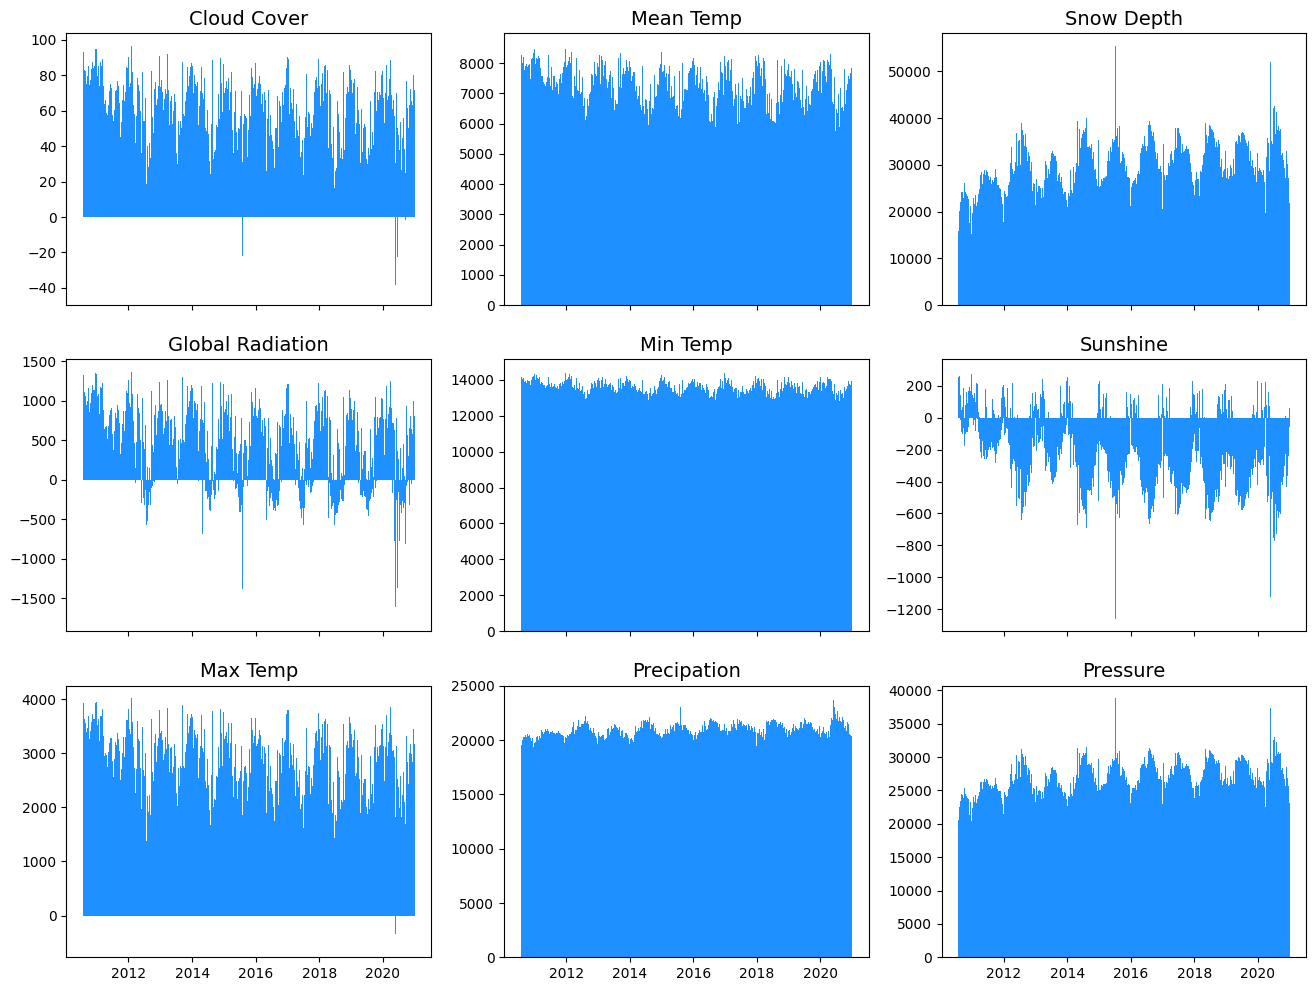

In [445]:
fig, ax = plt.subplots(ncols=3, nrows=3, sharex=True, figsize=(16,12))

ax[0][0].bar(dfW.index, df_noise.cloud_cover, width=5, color='dodgerblue')
ax[0][0].set_title('Cloud Cover', fontsize=14)
ax[1][0].bar(dfW.index, df_noise.global_radiation, width=5, color='dodgerblue')
ax[1][0].set_title('Global Radiation', fontsize=14)
ax[2][0].bar(dfW.index, df_noise.max_temp, width=5, color='dodgerblue')
ax[2][0].set_title('Max Temp', fontsize=14)
ax[0][1].bar(dfW.index, df_noise.mean_temp, width=5, color='dodgerblue')
ax[0][1].set_title('Mean Temp', fontsize=14)
ax[1][1].bar(dfW.index, df_noise.min_temp, width=5, color='dodgerblue')
ax[1][1].set_title('Min Temp', fontsize=14)
ax[2][1].bar(dfW.index, df_noise.precipitation, width=5, color='dodgerblue')
ax[2][1].set_title('Precipation', fontsize=14)
ax[0][2].bar(dfW.index, df_noise.snow_depth, width=5, color='dodgerblue')
ax[0][2].set_title('Snow Depth', fontsize=14)
ax[1][2].bar(dfW.index, df_noise.sunshine, width=5, color='dodgerblue')
ax[1][2].set_title('Sunshine', fontsize=14)
ax[2][2].bar(dfW.index, df_noise.pressure, width=5, color='dodgerblue')
ax[2][2].set_title('Pressure', fontsize=14)

plt.show()

In [449]:
x_train, x_test, y_train, y_test = train_test_split(df_noise[features2], df_noise[target], test_size = 0.3, random_state=0)

In [450]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9253099864210891

In [451]:
y_prediction = model.predict(x_test)
r2_score(y_prediction, y_test)

0.9175842228986418